# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Загрузка данных

In [236]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии

In [237]:
series = df['JP_Sales']

In [238]:
series.max()

10.22

In [239]:
series.min()

0.0

In [240]:
bin_width = series.max() / 10
x_range = [i * bin_width for i in range(11)]

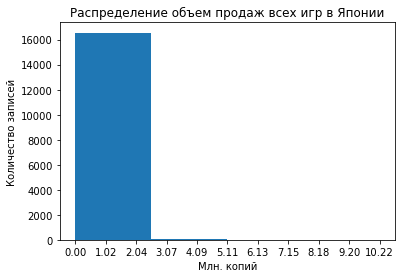

In [241]:
### YOUR CODE HERE ###
fig, ax = plt.subplots()
ax.hist(series, bins=4)
plt.title('Распределение объем продаж всех игр в Японии')
plt.xlabel('Млн. копий')
plt.ylabel('Количество записей')

plt.xticks(x_range)
plt.show()

In [242]:
df['JP_Sales'].describe()

count    16598.000000
mean         0.077782
std          0.309291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

Text(0, 0.5, 'Млн. копий')

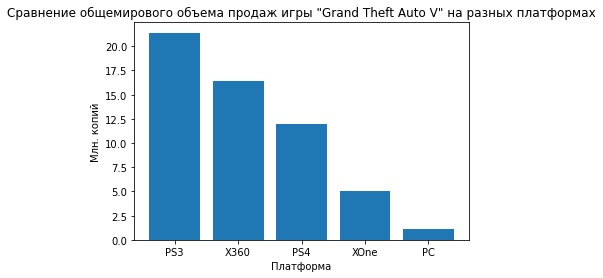

In [243]:
### YOUR CODE HERE ###
df_1 = df.loc[df['Name'] == 'Grand Theft Auto V']
df_1 = df_1.groupby('Platform')['Global_Sales'].sum()
df_1 = df_1.sort_values(ascending=False).reset_index()

plt.bar(df_1['Platform'], df_1['Global_Sales'])
plt.title('Сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах')
plt.xlabel('Платформа')
plt.ylabel('Млн. копий')

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

In [244]:
### YOUR CODE HERE ###
df1 = df
df1['Year'] = df1['Year'].astype('Int64')
series = df1.groupby('Year')['Global_Sales'].sum()

In [245]:
series.index.min()

1980

In [246]:
series.index.max()

2020

In [247]:
x_range = list(range(series.index.min(), series.index.max() + 1, 10))
x_range

[1980, 1990, 2000, 2010, 2020]

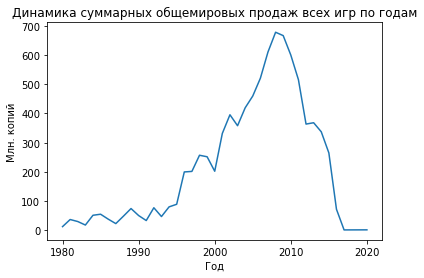

In [248]:
plt.plot(series)
plt.xticks(x_range)

plt.title('Динамика суммарных общемировых продаж всех игр по годам')
plt.xlabel('Год')
plt.ylabel('Млн. копий')

plt.show()

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

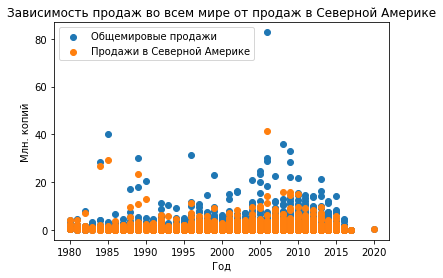

In [249]:
df['Year'] = df['Year'].astype(float)

plt.scatter(df['Year'], df['Global_Sales'], label = 'Общемировые продажи')
plt.scatter(df['Year'], df['NA_Sales'], label = 'Продажи в Северной Америке')

plt.title('Зависимость продаж во всем мире от продаж в Северной Америке')
plt.xlabel('Год')
plt.ylabel('Млн. копий')

plt.legend()

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

Text(0.5, 1.0, 'Диаграмма процентного соотношения продаж игры "Super Mario Bros." на разных платформах')

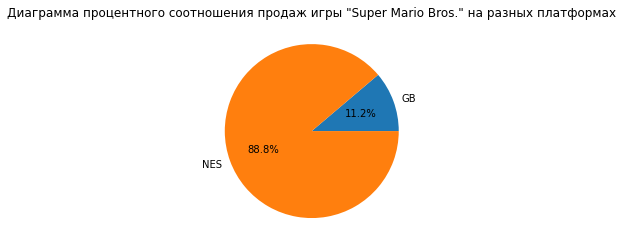

In [250]:
### YOUR CODE HERE ###
df_mario = df.loc[df['Name'] == 'Super Mario Bros.']
df_mario = df_mario[['Platform', 'Global_Sales']].groupby('Platform')['Global_Sales'].sum()

plt.pie(df_mario, labels=df_mario.index, autopct = '%1.1f%%')
plt.title('Диаграмма процентного соотношения продаж игры "Super Mario Bros." на разных платформах')